<a href="https://colab.research.google.com/github/verozhao/google3D/blob/main/updated11_14_Veronica'sCopy_Google3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google3D: YouTube Viral Video Forecasting

## Setup and Data Preprocessing
### 1. Set up project environment and create project documents.
### 2. Initial exploration of the dataset: identify and document missing values, outliers, and anomalies.
### 3. Data cleaning and transform data in Jupyter Notebook.

### Set up project environment and create project documents.
- Local environment is Jupyter Notebook.
- Cloud environment is Google Colab: [Colab Link](https://colab.research.google.com/drive/1cVB57dHD5CbpfPgP-XYBUL5nEoHCuiz2?usp=sharing)
- Project code maintained via GitHub: [Repo Link](https://github.com/rishitadhalbisoi/google3D)
- Project documents on Google Drive: [Drive Link](https://drive.google.com/drive/folders/1pNN3CvPdAQdRNCBkhGE_OcEM6hFn15vm?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Initial exploration of the dataset.

In [ ]:
# Load dataset

dataset = '/content/drive/My Drive/Google3D/US_YT_Trending_Data.csv'
df = pd.read_csv(dataset)
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ..."
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...


In [ ]:
# Dataset size
print(f'{df.shape[0]} rows')
print(f'{df.shape[1]} columns')

268787 rows
16 columns


In [ ]:
# Display first five rows

df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
# Display column names and corresponding data types

df.dtypes

# object- likely a string value

,0
video_id,object
title,object
publishedAt,object
channelId,object
channelTitle,object
categoryId,int64
trending_date,object
tags,object
view_count,int64
likes,int64


In [ ]:
# Summary statistics for numerical data

df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,268787.000000,2.687870e+05,2.687870e+05,268787.000000,2.687870e+05
mean,18.743511,2.734467e+06,1.314697e+05,1134.277495,1.014303e+04
std,6.786562,9.794087e+06,4.539469e+05,8047.291315,7.260853e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.725410e+05,1.796300e+04,0.000000,1.280000e+03
50%,20.000000,9.368710e+05,4.020500e+04,0.000000,2.754000e+03
75%,24.000000,2.106178e+06,9.877300e+04,467.000000,6.386000e+03
max,29.000000,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06


In [ ]:
# Summary statistics for categorical data

df.describe(include=['object'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description
count,268787,268787,268787,268787,268787,268787,268787,268787,264238
unique,47142,48471,46554,8302,8543,1323,32909,47142,48448
top,3ryID_SwU5E,Starlink Mission,2023-12-16T17:00:01Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,2021-06-17T00:00:00Z,[None],https://i.ytimg.com/vi/3ryID_SwU5E/default.jpg,Check out our other channels:NFL Mundo https:/...
freq,37,238,46,1793,1793,400,44494,37,853


In [ ]:
# Look at the number of unique channel ids = 8302
# Videos from these channels may be more likely to go viral

df['channelId'].nunique()

8302

In [ ]:

df['view_count'].describe()

,view_count
count,2.687870e+05
mean,2.734467e+06
std,9.794087e+06
min,0.000000e+00
25%,4.725410e+05
50%,9.368710e+05
75%,2.106178e+06
max,1.407644e+09


### Identify and document missing values, outliers, and anomalies.

In [ ]:
# Check for missing values

missing_values = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100

# Document missing data

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with missing data- only the description column has null values

missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df

,Missing Values,Percentage
description,4549,1.692418


In [ ]:
numerical_cols_to_check = df.select_dtypes(include=[np.number]).columns

# Calculate IQR to identify outliers

def calculate_iqr_outliers(param_df):
    outliers_mask = pd.DataFrame(False, index=param_df.index, columns=param_df.columns)

    for column in param_df.columns:
        Q1 = param_df[column].quantile(0.25)
        Q3 = param_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask[column] = (param_df[column] < lower_bound) | (param_df[column] > upper_bound)

    outliers_any_column = outliers_mask.any(axis=1)
    outliers_df = param_df[outliers_any_column]

    return outliers_df

outliers_df = calculate_iqr_outliers(df[numerical_cols_to_check])
outliers_df['video_id'] = df.loc[outliers_df.index, 'video_id'].values
outliers_df = outliers_df.reset_index(drop=True)
outliers_df

# 78827 rows have outliers in their numerical data

,categoryId,view_count,likes,dislikes,comment_count,video_id
0,22,1514614,156908,5855,35313,3C66w5Z0ixs
1,20,2381688,146739,2794,16549,M9Pmf9AB4Mo
2,24,2038853,353787,2628,40221,J78aPJ3VyNs
3,10,496771,23251,1856,7647,kXLn3HkpjaA
4,24,1402687,95694,2158,6613,SnsPZj91R7E
...,...,...,...,...,...,...
78822,1,1048965,61823,0,3561,jyYIiWZNptQ
78823,1,3049093,207252,0,13835,SV9SwKd6J3w
78824,10,5406115,156300,0,7471,ktjvgseCjYE
78825,24,23820264,720335,0,33664,d7DdLRe5QgM


In [ ]:
# Identifying anomalies via Z-score

z_scores = np.abs(stats.zscore(df[numerical_cols_to_check]))
z_anomalies_df = df[(z_scores > 3).any(axis=1)]
z_anomalies_df

# Z-score detection yields 4941 anomalies

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
35,GGEBtW2mWOk,Addressing RUMORS About Me While Testing New M...,2020-08-09T19:00:30Z,UCkvK_5omS-42Ovgah8KRKtg,jeffreestar,26,2020-08-12T00:00:00Z,jeffree star|jeffree star cosmetics|patrick st...,3427335,147162,62615,32307,https://i.ytimg.com/vi/GGEBtW2mWOk/default.jpg,False,False,Today I'm testing out ALL brand new makeup whi...
51,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,10,2020-08-12T00:00:00Z,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,https://i.ytimg.com/vi/hsm4poTWjMs/default.jpg,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...
128,QsUfsZzxi9c,"Whatever You Build, I'll Pay For!",2020-08-06T17:00:23Z,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,20,2020-08-12T00:00:00Z,[None],13073796,1643982,16286,97749,https://i.ytimg.com/vi/QsUfsZzxi9c/default.jpg,False,False,We have a giant area of land and whatever you ...
159,JSAfPh1A25E,TREASURE - 'BOY' M/V,2020-08-07T09:00:09Z,UCx9hXYOCvUYwrprEqe4ZQHA,TREASURE (트레저),24,2020-08-12T00:00:00Z,YG Entertainment|YG|와이지|K-pop|트레져|트레저|TREASURE...,18534845,1447194,25142,335075,https://i.ytimg.com/vi/JSAfPh1A25E/default.jpg,False,False,BOY Woah ohYeah넌 마치 beautiful danger쳐다볼 수 없어너무...
260,GGEBtW2mWOk,Addressing RUMORS About Me While Testing New M...,2020-08-09T19:00:30Z,UCkvK_5omS-42Ovgah8KRKtg,jeffreestar,26,2020-08-13T00:00:00Z,jeffree star|jeffree star cosmetics|patrick st...,3635239,152011,66088,33959,https://i.ytimg.com/vi/GGEBtW2mWOk/default.jpg,False,False,Today I'm testing out ALL brand new makeup whi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268578,mKdjycj-7eE,"Stop This Train, Win a Lamborghini",2024-03-16T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-14T00:00:00Z,[None],116840290,4302366,0,127313,https://i.ytimg.com/vi/mKdjycj-7eE/default.jpg,False,False,I still can’t believe what happened in this vi...
268580,kRlxTJSPKK8,Natanael Cano || BZRP Music Sessions #59,2024-04-04T00:00:30Z,UCmS75G-98QihSusY7NfCZtw,Bizarrap,24,2024-04-14T00:00:00Z,Bizarrap|Bzrp|bzpp|bizapop|music session|bisar...,25109822,1503617,0,108925,https://i.ytimg.com/vi/kRlxTJSPKK8/default.jpg,False,False,00:00 Endiamantado02:33 Entre las de 20Natan...
268636,erLbbextvlY,7 Days Stranded On An Island,2024-03-30T16:00:01Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-15T00:00:00Z,[None],117202051,4772606,0,133663,https://i.ytimg.com/vi/erLbbextvlY/default.jpg,False,False,I can’t believe we actually did thisSend money...
268702,wboGYls1Bns,Pushpa 2 The Rule Teaser | Allu Arjun | Sukuma...,2024-04-08T05:37:05Z,UCKZSn5C-RzrLjuWJF8wWiDw,Mythri Movie Makers,24,2024-04-15T00:00:00Z,Pushpa 2 The Rule Teaser|Allu Arjun|Sukumar|Ra...,112497953,1634699,0,54080,https://i.ytimg.com/vi/wboGYls1Bns/default.jpg,False,False,Pushpa 2 The Rule Teaser on Mythri Movie Maker...


In [ ]:
# Identifying anomalies using Isolation Forest

iso_forest = IsolationForest(contamination=0.1)
df['if_anomaly'] = iso_forest.fit_predict(df[numerical_cols_to_check])

if_anomalies_df = df[df['if_anomaly'] == -1]
df = df.drop(['if_anomaly'], axis=1)

if_anomalies_df = if_anomalies_df.reset_index(drop=True)

print(if_anomalies_df.loc[if_anomalies_df['view_count'].idxmax()])

if_anomalies_df

# IsolationForest yields 26416 anomalies

video_id                                                   cc2-4ci4G84
title                                     Discord Loot Boxes are here.
publishedAt                                       2024-04-01T17:46:17Z
channelId                                     UCZ5XnGb-3t7jCkXdawN2tkA
channelTitle                                                   Discord
categoryId                                                          24
trending_date                                     2024-04-03T00:00:00Z
tags                                                            [None]
view_count                                                  1407643634
likes                                                           126926
dislikes                                                             0
comment_count                                                    13987
thumbnail_link          https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg
comments_disabled                                                False
rating

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,if_anomaly
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,-1
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,-1
2,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,5999732,714287,15174,31039,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,-1
3,vePc5V4h_kg,Shark Attack Test- Human Blood vs. Fish Blood,2020-08-09T16:00:11Z,UCY1kMZp36IQSyNx_9h4mpCg,Mark Rober,28,2020-08-12T00:00:00Z,sharks|sharkweek|jaws|shark attack|blood in wa...,14684474,544038,15818,33507,https://i.ytimg.com/vi/vePc5V4h_kg/default.jpg,False,False,I personally got in the water and tested if Sh...,-1
4,p7HGUZWq_8s,Doing Doja Cat’s Makeup!!,2020-08-11T19:00:09Z,UCucot-Zp428OwkyRm2I7v2Q,James Charles,24,2020-08-12T00:00:00Z,james|james charles|makeup artist|covergirl|co...,3662673,394675,5757,27346,https://i.ytimg.com/vi/p7HGUZWq_8s/default.jpg,False,False,HI SISTERS! Today’s video is a collaboration w...,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,VZIm_2MgdeA,JoJo Siwa - Karma (Official Video),2024-04-05T04:00:06Z,UCK4Gv-nQkIl-n17sfSmshGA,JoJoSiwaVEVO,10,2024-04-15T00:00:00Z,JoJo Siwa New Song|JoJo Siwa Karma|JoJo Siwa O...,22050057,202646,0,195995,https://i.ytimg.com/vi/VZIm_2MgdeA/default.jpg,False,False,Official Video for “Karma” by JoJo Siwa Listen...,-1
26875,mKdjycj-7eE,"Stop This Train, Win a Lamborghini",2024-03-16T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-15T00:00:00Z,[None],117249490,4309093,0,127492,https://i.ytimg.com/vi/mKdjycj-7eE/default.jpg,False,False,I still can’t believe what happened in this vi...,-1
26876,SV9SwKd6J3w,R O U N D 6 ｜ Alien Stage,2024-04-05T09:00:08Z,UCch9Dmg5Juwp8MZGvAmAp4Q,VIVINOS,1,2024-04-15T00:00:00Z,[None],3049093,207252,0,13835,https://i.ytimg.com/vi/SV9SwKd6J3w/default.jpg,False,False,[Alien Stage IVAN & TILL MD Pre-order]📡 https:...,-1
26877,d7DdLRe5QgM,skibidi toilet 72 (full episode),2024-04-05T06:30:18Z,UCsSsgPaZ2GSmO6il8Cb5iGA,DaFuq!?Boom!,24,2024-04-15T00:00:00Z,sfm animation|skibidi toilet vs cameramen|skib...,23820264,720335,0,33664,https://i.ytimg.com/vi/d7DdLRe5QgM/default.jpg,False,False,"g-toilet, astro toilets and titans clash in co...",-1


### 3. Data cleaning and transform data in Jupyter Notebook.

In [ ]:
# Converting publishedAt and trending_date to Datetime format

df['publishedAt'] = pd.to_datetime(df['publishedAt']) # publishedAt has a date and time
df['trending_date'] = pd.to_datetime(df['trending_date']) # trending date has no associated time
df[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11 19:20:14+00:00,2020-08-12 00:00:00+00:00
1,2020-08-11 17:00:10+00:00,2020-08-12 00:00:00+00:00
2,2020-08-11 16:34:06+00:00,2020-08-12 00:00:00+00:00
3,2020-08-11 16:38:55+00:00,2020-08-12 00:00:00+00:00
4,2020-08-11 15:10:05+00:00,2020-08-12 00:00:00+00:00


In [ ]:
# Feature engineering year, month, day, time

df['publishedAt_year'] = df['publishedAt'].dt.year
df['publishedAt_month'] = df['publishedAt'].dt.month
df['publishedAt_date'] = df['publishedAt'].dt.day
df['publishedAt_time'] = df['publishedAt'].dt.time

df['trendingDate_year'] = df['trending_date'].dt.year
df['trendingDate_month'] = df['trending_date'].dt.month
df['trendingDate_date'] = df['trending_date'].dt.day

# Display the first few rows to check the new columns
df[['publishedAt_year', 'publishedAt_month', 'publishedAt_date', 'publishedAt_time',
          'trendingDate_year', 'trendingDate_month', 'trendingDate_date']]


,publishedAt_year,publishedAt_month,publishedAt_date,publishedAt_time,trendingDate_year,trendingDate_month,trendingDate_date
0,2020,8,11,19:20:14,2020,8,12
1,2020,8,11,17:00:10,2020,8,12
2,2020,8,11,16:34:06,2020,8,12
3,2020,8,11,16:38:55,2020,8,12
4,2020,8,11,15:10:05,2020,8,12
...,...,...,...,...,...,...,...
268782,2024,4,8,15:55:44,2024,4,15
268783,2024,4,4,11:00:02,2024,4,15
268784,2024,4,7,14:53:25,2024,4,15
268785,2024,4,7,18:00:03,2024,4,15


In [ ]:
# Handling missing values
# Above analysis shows the only categorical column with null values is the description column
# We can either DROP those values or fill with an empty value ''

df.dropna(subset=['description'], inplace=True)
df = df.reset_index(drop=True)
df.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


In [ ]:
# Add human readable category_name column

category_mapping = {
    1:'Film & Animation',
    2:'Autos & Vehicles',
    10:'Music',
    15:'Music',
    17:'Sports',
    19:'Travel & Events',
    20:'Gaming',
    22:'Videoblogging',
    23:'Comedy',
    24:'Entertainment',
    25:'News & Politics',
    26:'Howto & Style',
    27:'Education',
    28:'Science & Technology',
    29:'Nonprofits & Activism'
}

df.insert(df.columns.get_loc('categoryId'), 'category_name', df['categoryId'].map(category_mapping))
df

,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,...,comments_disabled,ratings_disabled,description,publishedAt_year,publishedAt_month,publishedAt_date,publishedAt_time,trendingDate_year,trendingDate_month,trendingDate_date
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,Videoblogging,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8,11,19:20:14,2020,8,12
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,...,False,False,"While running her own modding shop, Ramya Pare...",2020,8,11,17:00:10,2020,8,12
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,...,False,False,I left youtube for a month and this is what ha...,2020,8,11,16:34:06,2020,8,12
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,...,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020,8,11,16:38:55,2020,8,12
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,...,False,False,Transforming The LaBrant Family's empty white ...,2020,8,11,15:10:05,2020,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264233,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08 15:55:44+00:00,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,News & Politics,25,2024-04-15 00:00:00+00:00,morning-news|Eclipses|travel|travel news|weath...,359130,...,False,False,Millions of people in the United States are tr...,2024,4,8,15:55:44,2024,4,15
264234,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04 11:00:02+00:00,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,Entertainment,24,2024-04-15 00:00:00+00:00,[None],3998181,...,False,False,"John Oliver discusses food delivery apps, how ...",2024,4,4,11:00:02,2024,4,15
264235,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07 14:53:25+00:00,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,Entertainment,24,2024-04-15 00:00:00+00:00,japan|cdawgva|abroad in japan|trash taste,873960,...,False,False,We reveal 12 things no-one tells you to expect...,2024,4,7,14:53:25,2024,4,15
264236,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07 18:00:03+00:00,UChQ-d14tHB62nskossxO0tw,Joe Fazer,Entertainment,24,2024-04-15 00:00:00+00:00,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,...,False,False,Use code JOE at checkout to get discounts on M...,2024,4,7,18:00:03,2024,4,15


In [ ]:
# Check for duplicates and drop duplicates

duplicates = df.duplicated().sum()
print(f'{duplicates} duplicates')

df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

83 duplicates


,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,...,comments_disabled,ratings_disabled,description,publishedAt_year,publishedAt_month,publishedAt_date,publishedAt_time,trendingDate_year,trendingDate_month,trendingDate_date
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,Videoblogging,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8,11,19:20:14,2020,8,12
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,...,False,False,"While running her own modding shop, Ramya Pare...",2020,8,11,17:00:10,2020,8,12
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,...,False,False,I left youtube for a month and this is what ha...,2020,8,11,16:34:06,2020,8,12
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,...,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020,8,11,16:38:55,2020,8,12
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,...,False,False,Transforming The LaBrant Family's empty white ...,2020,8,11,15:10:05,2020,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264150,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08 15:55:44+00:00,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,News & Politics,25,2024-04-15 00:00:00+00:00,morning-news|Eclipses|travel|travel news|weath...,359130,...,False,False,Millions of people in the United States are tr...,2024,4,8,15:55:44,2024,4,15
264151,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04 11:00:02+00:00,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,Entertainment,24,2024-04-15 00:00:00+00:00,[None],3998181,...,False,False,"John Oliver discusses food delivery apps, how ...",2024,4,4,11:00:02,2024,4,15
264152,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07 14:53:25+00:00,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,Entertainment,24,2024-04-15 00:00:00+00:00,japan|cdawgva|abroad in japan|trash taste,873960,...,False,False,We reveal 12 things no-one tells you to expect...,2024,4,7,14:53:25,2024,4,15
264153,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07 18:00:03+00:00,UChQ-d14tHB62nskossxO0tw,Joe Fazer,Entertainment,24,2024-04-15 00:00:00+00:00,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,...,False,False,Use code JOE at checkout to get discounts on M...,2024,4,7,18:00:03,2024,4,15


In [ ]:
# count how many times a video_id occurs, see how engagement rate changes
# number of unique channels: famous channels show up often, the same video may show up often

In [ ]:
# Convert boolean columns to numerical

df['comments_disabled'] = df['comments_disabled'].astype(int)
df['ratings_disabled'] = df['ratings_disabled'].astype(int)
df[['comments_disabled', 'ratings_disabled']]

,comments_disabled,ratings_disabled
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
264150,0,0
264151,0,0
264152,0,0
264153,0,0


In [ ]:
df['comments_disabled'].value_counts()

,count
comments_disabled,
0,260705
1,3450


In [ ]:
df['ratings_disabled'].value_counts()

,count
ratings_disabled,
0,262674
1,1481


### What to do about outliers/anomalies?

## Exploratory Data Analysis
### Note: data has NOT been normalized.
### 1. Conduct EDA to identify patterns and trends.
### 2. Visualize key variables and their relationships.
### 3. Analyze correlations between features and the target variable (likelihood of a video becoming viral).
### 4. Document key insights in a Jupyter notebook with visualizations.
### 5. Begin identifying potential features for the model based on EDA.

### Conduct EDA to identify patterns and trends.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264155 entries, 0 to 264154
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   video_id            264155 non-null  object             
 1   title               264155 non-null  object             
 2   publishedAt         264155 non-null  datetime64[ns, UTC]
 3   channelId           264155 non-null  object             
 4   channelTitle        264155 non-null  object             
 5   category_name       264155 non-null  object             
 6   categoryId          264155 non-null  int64              
 7   trending_date       264155 non-null  datetime64[ns, UTC]
 8   tags                264155 non-null  object             
 9   view_count          264155 non-null  int64              
 10  likes               264155 non-null  int64              
 11  dislikes            264155 non-null  int64              
 12  comment_count   

In [ ]:
df.describe(include='all')

,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,...,comments_disabled,ratings_disabled,description,publishedAt_year,publishedAt_month,publishedAt_date,publishedAt_time,trendingDate_year,trendingDate_month,trendingDate_date
count,264155,264155,264155,264155,264155,264155,264155.000000,264155,264155,2.641550e+05,...,264155.000000,264155.000000,264155,264155.000000,264155.000000,264155.000000,264155,264155.000000,264155.000000,264155.000000
unique,46239,47566,NaN,7992,8221,14,NaN,NaN,32828,NaN,...,NaN,NaN,48448,NaN,NaN,NaN,22596,NaN,NaN,NaN
top,tnTPaLOaHz8,Starlink Mission,NaN,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,Gaming,NaN,NaN,[None],NaN,...,NaN,NaN,Check out our other channels:NFL Mundo https:/...,NaN,NaN,NaN,16:00:10,NaN,NaN,NaN
freq,37,238,NaN,1793,1793,52824,NaN,NaN,40671,NaN,...,NaN,NaN,853,NaN,NaN,NaN,932,NaN,NaN,NaN
mean,NaN,NaN,2022-06-10 21:58:05.081031680+00:00,NaN,NaN,NaN,18.714232,2022-06-14 11:41:20.893414656+00:00,NaN,2.722996e+06,...,0.013061,0.005607,NaN,2021.934875,6.593447,15.683534,NaN,2021.949121,6.562541,15.587522
min,NaN,NaN,2020-08-03 21:51:14+00:00,NaN,NaN,NaN,1.000000,2020-08-12 00:00:00+00:00,NaN,0.000000e+00,...,0.000000,0.000000,NaN,2020.000000,1.000000,1.000000,NaN,2020.000000,1.000000,1.000000
25%,NaN,NaN,2021-07-01 16:00:06+00:00,NaN,NaN,NaN,17.000000,2021-07-06 00:00:00+00:00,NaN,4.727070e+05,...,0.000000,0.000000,NaN,2021.000000,3.000000,8.000000,NaN,2021.000000,3.000000,8.000000
50%,NaN,NaN,2022-06-14 18:38:18+00:00,NaN,NaN,NaN,20.000000,2022-06-18 00:00:00+00:00,NaN,9.358900e+05,...,0.000000,0.000000,NaN,2022.000000,7.000000,16.000000,NaN,2022.000000,7.000000,15.000000
75%,NaN,NaN,2023-05-12 07:03:46+00:00,NaN,NaN,NaN,24.000000,2023-05-16 00:00:00+00:00,NaN,2.102846e+06,...,0.000000,0.000000,NaN,2023.000000,10.000000,23.000000,NaN,2023.000000,10.000000,23.000000
max,NaN,NaN,2024-04-14 10:00:53+00:00,NaN,NaN,NaN,29.000000,2024-04-15 00:00:00+00:00,NaN,1.407644e+09,...,1.000000,1.000000,NaN,2024.000000,12.000000,31.000000,NaN,2024.000000,12.000000,31.000000


In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,category_name,categoryId,trending_date,tags,view_count,...,comments_disabled,ratings_disabled,description,publishedAt_year,publishedAt_month,publishedAt_date,publishedAt_time,trendingDate_year,trendingDate_month,trendingDate_date
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,Videoblogging,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,...,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8,11,19:20:14,2020,8,12
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,...,0,0,"While running her own modding shop, Ramya Pare...",2020,8,11,17:00:10,2020,8,12
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,...,0,0,I left youtube for a month and this is what ha...,2020,8,11,16:34:06,2020,8,12
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,...,0,0,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020,8,11,16:38:55,2020,8,12
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,...,0,0,Transforming The LaBrant Family's empty white ...,2020,8,11,15:10:05,2020,8,12


In [ ]:
# We want to see the most common words that show up in description and tags
    # Keep in mind that videos may repeat
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(['https', 'com', 'www', 'http'])

# Function to preprocess text: lowercase and remove special characters
def preprocess(text):
    if pd.isna(text):
        return []
    # Convert to lowercase and remove punctuation
    text = text.lower()
    # Remove any non-alphabetic characters and split words
    words = re.findall(r'\b\w+\b', text)
    words = [word for word in words if word not in stop_words]
    return words


df['tags_words'] = df['tags'].apply(preprocess)
df['description_words'] = df['description'].apply(preprocess)

all_tags_words = [word for words_list in df['tags_words'] for word in words_list]
all_description_words = [word for words_list in df['description_words'] for word in words_list]


tags_word_count = Counter(all_tags_words)
description_word_count = Counter(all_description_words)

common_tags = tags_word_count.most_common()
common_description = description_word_count.most_common()

tags_word_count_df = pd.DataFrame(common_tags, columns=['word', 'count'])
description_word_count_df = pd.DataFrame(common_description, columns=['word', 'count'])

print("Most common words in 'tags':")
print(tags_word_count_df.head(50))

print("\nMost common words in 'description':")
print(description_word_count_df.head(50))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


KeyboardInterrupt: 

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
from wordcloud import WordCloud

# generate a word cloud
def generate_word_cloud(word_counts):
    word_dict = dict(word_counts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

print("Word Cloud for 'Tags':")
generate_word_cloud(common_tags)

print()
print()

print("Word Cloud for 'Description':")
generate_word_cloud(common_description)

In [ ]:
# Distribution of view_count
plt.figure(figsize=(10, 6))
sns.histplot(df['view_count'], kde=True)
plt.title('Distribution of View Count')
plt.show()

# Distribution of likes
plt.figure(figsize=(10, 6))
sns.histplot(df['likes'], kde=True)
plt.title('Distribution of Likes')
plt.show()

# youtube removes dislikes end of 2021
# Distribution of dislikes
plt.figure(figsize=(10, 6))
sns.histplot(df['dislikes'], kde=True)
plt.title('Distribution of Dislikes')
plt.show()

In [ ]:
df_without_outliers = df[~df.video_id.isin(z_anomalies_df.video_id)]
df_without_outliers.reset_index(inplace=True)
df_without_outliers

In [ ]:
# Distribution of view_count
plt.figure(figsize=(10, 6))
sns.histplot(df_without_outliers['view_count'], kde=True)
plt.title('Distribution of View Count (No Outliers)')
plt.show()

# Distribution of likes
plt.figure(figsize=(10, 6))
sns.histplot(df_without_outliers['likes'], kde=True)
plt.title('Distribution of Likes (No Outliers)')
plt.show()

# Distribution of dislikes
plt.figure(figsize=(10, 6))
sns.histplot(df_without_outliers['dislikes'], kde=True)
plt.title('Distribution of Dislikes (No Outliers)')
plt.show()

In [ ]:
# Scatter plot of view_count vs. likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='likes', data=df)
plt.title('View Count vs. Likes')
plt.show()

# Scatter plot of view_count vs. dislikes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='dislikes', data=df)
plt.title('View Count vs. Dislikes')
plt.show()

In [ ]:
# Scatter plot for view_count vs. net_likes with Logarithmic scale
df['net_likes'] = df['likes'] - df['dislikes']
plt.figure(figsize=(10, 6))

sns.scatterplot(x='view_count', y='net_likes', data=df, color='blue', label='Net Likes vs. View Count')

# set the x-axis to logarithmic scale
plt.xscale('log')
max_val = max(df['view_count'].max(), df['net_likes'].max())
plt.title('View Count vs. Net Likes (Log Scale)')
plt.xlabel('View Count (log scale)')
plt.ylabel('Net Likes (Likes - Dislikes)')
plt.legend()
plt.show()

In [ ]:
# Scatter plot for view_count vs. net_likes excluding top 1% outliers

# filter out extreme outliers
threshold = np.percentile(df['view_count'], 99)  # top 1% are considered outliers
filtered_df = df[df['view_count'] < threshold]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='net_likes', data=filtered_df, color='blue', label='Net Likes vs. View Count')
plt.plot([filtered_df['view_count'].min(), filtered_df['view_count'].max()], [filtered_df['view_count'].min(), filtered_df['view_count'].max()], linestyle='--', color='orange', label='y = x')
plt.title('View Count vs. Net Likes (Filtered)')
plt.xlabel('View Count')
plt.ylabel('Net Likes (Likes - Dislikes)')
plt.legend()
plt.show()


In [ ]:
# Scatter plot of view_count vs. likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='likes', data=df_without_outliers)
plt.title('View Count vs. Likes (No Outliers)')
plt.show()

# Scatter plot of view_count vs. dislikes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='dislikes', data=df_without_outliers)
plt.title('View Count vs. Dislikes (No Outliers)')
plt.show()

In [ ]:
df.loc[df['view_count'].idxmax()]

# https://www.youtube.com/watch?v=cc2-4ci4G84
# ^ originally had 1.4 billion views because it was played each time discord was opened -> yt mass removed the views
# (between then-- april 1st 2024-- and now, it has only 3.9m views)

In [ ]:
# Boxplot of view_count across categoryId
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='view_count', data=df)
plt.title('View Count by Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Boxplot of view_count across categoryId
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='view_count', data=df_without_outliers)
plt.title('View Count by Category (No Outliers)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Bar plot of categoryId
plt.figure(figsize=(10, 6))
sns.countplot(y='category_name', data=df, order=df['category_name'].value_counts().index)
plt.title('Video Categories')
plt.show()

# Bar plot of comments_disabled
plt.figure(figsize=(10, 6))
sns.countplot(x='comments_disabled', data=df)
plt.title('Comments Disabled (0 or 1)')
plt.show()

# Bar plot of ratings_disabled
plt.figure(figsize=(10, 6))
sns.countplot(x='ratings_disabled', data=df)
plt.title('Ratings Disabled (0 or 1)')
plt.show()

In [ ]:
print(df['publishedAt'].min())
print(df['publishedAt'].max())
# Extract date features
df['publish_year'] = df['publishedAt'].dt.year
df['publish_month'] = df['publishedAt'].dt.month

# Plot the number of videos published per year
plt.figure(figsize=(10, 6))
sns.countplot(x='publish_year', data=df)
plt.title('Number of Videos Published per Year')
plt.show()

# Plot the number of videos published per month
plt.figure(figsize=(10, 6))
sns.countplot(x='publish_month', data=df)
plt.title('Number of Videos Published per Month')
plt.show()

# Plot trends in view_count over time
plt.figure(figsize=(14, 8))
df.groupby('publish_year')['view_count'].sum().plot()
plt.title('Total View Count per Year')
plt.show()

In [ ]:
# Correlation matrix
corr_matrix = df[numerical_cols_to_check].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Week 1 & 2 Recommended Deliverables:

1. Project Docs: Scope and deliverables
2. Jupyter Notebook: Data preprocessing steps, including code for cleaning and transforming the data
3. **TODO |** Markdown File: Summary of the data issues encountered and how they were addressed (to be submitted at the end of Week 2)

### Week 3 & 4 Recommended Deliverables:
1. Jupyter Notebook: EDA process, including code, visualizations, and insights
2. **TODO |** PowerPoint Slides: Key findings and potential features (to be presented internally at the end of Week 4)

In [ ]:
df.sort_values(by='view_count', ascending=False).head(40)

In [ ]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['days_since_publication'] = (df['trending_date'] - df['publishedAt']).dt.days
df_sorted = df.sort_values(['video_id', 'days_since_publication'])
df_sorted['daily_growth_rate'] = df_sorted.groupby('video_id')['view_count'].pct_change() / df_sorted.groupby('video_id')['days_since_publication'].diff()
df_sorted['cumulative_growth_rate'] = (df_sorted['view_count'] / df_sorted.groupby('video_id')['view_count'].transform('first') - 1) / df_sorted['days_since_publication']

def plot_video_growth(video_id):
    video_data = df_sorted[df_sorted['video_id'] == video_id]

    plt.figure(figsize=(12, 6))
    plt.plot(video_data['days_since_publication'], video_data['daily_growth_rate'], label='Daily Growth Rate')
    plt.plot(video_data['days_since_publication'], video_data['cumulative_growth_rate'], label='Cumulative Growth Rate')

    plt.title(f"Growth Rates for Video: {video_id}")
    plt.xlabel("Days Since Publication")
    plt.ylabel("Growth Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

for video_id in df_sorted['video_id'].unique():
    plot_video_growth(video_id)

avg_growth_rates = df_sorted.groupby('video_id').agg({
    'daily_growth_rate': 'mean',
    'cumulative_growth_rate': 'mean',
    'view_count': 'max',
    'title': 'first'
}).sort_values('cumulative_growth_rate', ascending=False)

print("Top 10 Videos by Cumulative Growth Rate:")
print(avg_growth_rates[['title', 'cumulative_growth_rate', 'view_count']].head(10))

plt.figure(figsize=(12, 6))
for video_id in df_sorted['video_id'].unique():
    video_data = df_sorted[df_sorted['video_id'] == video_id]
    plt.plot(video_data['days_since_publication'], video_data['cumulative_growth_rate'], label=video_id)

plt.title("Cumulative Growth Rates for All Videos")
plt.xlabel("Days Since Publication")
plt.ylabel("Cumulative Growth Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['days_since_publication'] = (df['trending_date'] - df['publishedAt']).dt.days

df_sorted = df.sort_values(['video_id', 'days_since_publication'])
df_sorted['daily_growth_rate'] = df_sorted.groupby('video_id')['view_count'].pct_change() / df_sorted.groupby('video_id')['days_since_publication'].diff()
df_sorted['cumulative_growth_rate'] = (df_sorted['view_count'] / df_sorted.groupby('video_id')['view_count'].transform('first') - 1) / df_sorted['days_since_publication']
df_sorted['daily_growth_rate'] = df_sorted['daily_growth_rate'].replace([np.inf, -np.inf], np.nan)
df_sorted['cumulative_growth_rate'] = df_sorted['cumulative_growth_rate'].replace([np.inf, -np.inf], np.nan)

avg_growth_rates = df_sorted.groupby('video_id').agg({
    'daily_growth_rate': lambda x: x.mean(skipna=True),
    'cumulative_growth_rate': lambda x: x.mean(skipna=True),
    'view_count': 'max',
    'title': 'first',
    'category_name': 'first'
}).sort_values('cumulative_growth_rate', ascending=False)

avg_growth_rates = avg_growth_rates.dropna(subset=['daily_growth_rate', 'cumulative_growth_rate'])

print("Summary Statistics for Growth Rates:")
print(avg_growth_rates[['daily_growth_rate', 'cumulative_growth_rate']].describe())

print("\nTop 10 Videos by Cumulative Growth Rate:")
print(avg_growth_rates[['title', 'category_name', 'cumulative_growth_rate', 'view_count']].head(10))

plt.figure(figsize=(12, 6))
sns.histplot(avg_growth_rates['cumulative_growth_rate'], kde=True)
plt.title("Distribution of Cumulative Growth Rates")
plt.xlabel("Cumulative Growth Rate")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='category_name', y='cumulative_growth_rate', data=avg_growth_rates)
plt.title("Cumulative Growth Rates by Category")
plt.xlabel("Category")
plt.ylabel("Cumulative Growth Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(avg_growth_rates['view_count'], avg_growth_rates['cumulative_growth_rate'])
plt.title("View Count vs. Cumulative Growth Rate")
plt.xlabel("View Count")
plt.ylabel("Cumulative Growth Rate")
plt.xscale('log')
plt.show()

correlation = avg_growth_rates[['daily_growth_rate', 'cumulative_growth_rate', 'view_count']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['days_since_publication'] = (df['trending_date'] - df['publishedAt']).dt.days

df_sorted = df.sort_values(['video_id', 'days_since_publication'])
df_sorted['daily_growth_rate'] = df_sorted.groupby('video_id')['view_count'].pct_change() / df_sorted.groupby('video_id')['days_since_publication'].diff()
df_sorted['cumulative_growth_rate'] = (df_sorted['view_count'] / df_sorted.groupby('video_id')['view_count'].transform('first') - 1) / df_sorted['days_since_publication']
df_sorted['daily_growth_rate'] = df_sorted['daily_growth_rate'].replace([np.inf, -np.inf], np.nan)
df_sorted['cumulative_growth_rate'] = df_sorted['cumulative_growth_rate'].replace([np.inf, -np.inf], np.nan)

avg_growth_rates = df_sorted.groupby('video_id').agg({
    'daily_growth_rate': lambda x: x.mean(skipna=True),
    'cumulative_growth_rate': lambda x: x.mean(skipna=True),
    'view_count': 'max',
    'title': 'first',
    'category_name': 'first'
}).sort_values('cumulative_growth_rate', ascending=False)

avg_growth_rates = avg_growth_rates.dropna(subset=['daily_growth_rate', 'cumulative_growth_rate'])

def plot_growth_rates_by_category(data, growth_rate_column, title):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='category_name', y=growth_rate_column, data=data)
    plt.title(f"{title} - Box Plot")
    plt.xlabel("Category")
    plt.ylabel(growth_rate_column.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    sns.violinplot(x='category_name', y=growth_rate_column, data=data)
    plt.title(f"{title} - Violin Plot")
    plt.xlabel("Category")
    plt.ylabel(growth_rate_column.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

plot_growth_rates_by_category(avg_growth_rates, 'daily_growth_rate', "Daily Growth Rates by Category")
plot_growth_rates_by_category(avg_growth_rates, 'cumulative_growth_rate', "Cumulative Growth Rates by Category")

category_growth_rates = avg_growth_rates.groupby('category_name').agg({
    'daily_growth_rate': 'mean',
    'cumulative_growth_rate': 'mean'
}).sort_values('cumulative_growth_rate', ascending=False)

print("Average Growth Rates by Category:")
print(category_growth_rates)

plt.figure(figsize=(12, 6))
category_growth_rates['cumulative_growth_rate'].plot(kind='bar')
plt.title("Average Cumulative Growth Rate by Category")
plt.xlabel("Category")
plt.ylabel("Average Cumulative Growth Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['days_since_publication'] = (df['trending_date'] - df['publishedAt']).dt.days
df_sorted = df.sort_values(['video_id', 'days_since_publication'])
df_sorted['cumulative_growth_rate'] = (df_sorted['view_count'] / df_sorted.groupby('video_id')['view_count'].transform('first') - 1) / df_sorted['days_since_publication'] # try alternative metrices
df_sorted['cumulative_growth_rate'] = df_sorted['cumulative_growth_rate'].replace([np.inf, -np.inf], np.nan)

df_sorted = df_sorted.dropna(subset=['cumulative_growth_rate'])
plt.figure(figsize=(16, 10))
scatter = plt.scatter(df_sorted['days_since_publication'],
                      df_sorted['cumulative_growth_rate'],
                      c=df_sorted['category_name'].astype('category').cat.codes,
                      alpha=0.5,
                      cmap='viridis')

plt.title('Video Growth Rate vs. Days Since Publication', fontsize=16)
plt.xlabel('Days Since Publication', fontsize=14)
plt.ylabel('Cumulative Growth Rate', fontsize=14)
plt.yscale('symlog')

categories = df_sorted['category_name'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / len(categories)),
                      markersize=8, alpha=0.5, label=cat) for i, cat in enumerate(categories)]
plt.legend(handles=handles, title='Category', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

print("Summary Statistics:")
print(df_sorted.groupby('category_name').agg({
    'cumulative_growth_rate': ['mean', 'median', 'min', 'max'],
    'days_since_publication': ['mean', 'median', 'min', 'max']
}))

correlation = df_sorted['days_since_publication'].corr(df_sorted['cumulative_growth_rate'])
print(f"\nCorrelation between days since publication and cumulative growth rate: {correlation:.4f}")

In [ ]:
df

## Modeling

### Classification

####  Baseline Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
data=df
timestamp_columns = ['publishedAt', 'trending_date']
for col in timestamp_columns:
    data[col] = pd.to_datetime(data[col])
    data[f'{col}_year'] = data[col].dt.year
    data[f'{col}_month'] = data[col].dt.month
    data[f'{col}_day'] = data[col].dt.day

numeric_columns = data.select_dtypes(include=[np.number]).columns
X = data[numeric_columns].drop(['categoryId'], axis=1)
y = data['category_name']


X = X.fillna(X.mean()) # try other methods see which one works the best

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")

print("Overall Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


Logistic Regression Accuracy: 0.2640


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                       precision    recall  f1-score   support

     Autos & Vehicles       0.00      0.00      0.00      1103
               Comedy       0.05      0.00      0.00      2506
            Education       0.00      0.00      0.00      1254
        Entertainment       0.24      0.29      0.26     10690
     Film & Animation       0.00      0.00      0.00      2121
               Gaming       0.24      0.73      0.36     10677
        Howto & Style       0.00      0.00      0.00      1358
                Music       0.40      0.14      0.20      8740
      News & Politics       0.39      0.11      0.17      1927
Nonprofits & Activism       0.00      0.00      0.00        21
 Science & Technology       0.50      0.02      0.04      1617
               Sports       0.43      0.26      0.33      6188
      Travel & Events       0.00      0.00      0.00       345
        Videoblogging       0.25      0.00      0.00      4284

             accuracy                           0.26 

#### Models with transformers and hyperparameter tuning

In [ ]:
data=df

In [ ]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['publishedAt'] = pd.to_datetime(X_['publishedAt'])
        X_['trending_date'] = pd.to_datetime(X_['trending_date'])

        X_['days_to_trend'] = (X_['trending_date'] - X_['publishedAt']).dt.total_seconds() / 86400
        X_['title_length'] = X_['title'].str.len()
        X_['tags_count'] = X_['tags'].str.count('\|') + 1
        X_['description_length'] = X_['description'].str.len()

        X_['publishedAt_dayofweek'] = X_['publishedAt'].dt.dayofweek
        X_['publishedAt_hour'] = X_['publishedAt'].dt.hour

        return X_

features = ['days_to_trend', 'title_length', 'tags_count', 'description_length',
            'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId']

virality_threshold = data['view_count'].quantile(0.9)

data['is_viral'] = (data['view_count'] > virality_threshold).astype(int)

X = data[['publishedAt', 'trending_date', 'title', 'tags', 'description', 'categoryId']]
y = data['is_viral']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['days_to_trend', 'title_length', 'tags_count', 'description_length',
                    'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('feature_engineer', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif, k='all')),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

    return pipeline, accuracy, auc

results = {}

for name, model in models.items():
    pipeline, accuracy, auc = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'accuracy': accuracy, 'auc': auc, 'pipeline': pipeline}
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")
    print(classification_report(y_test, pipeline.predict(X_test)))
    print("="*50)

best_model = max(results, key=lambda x: results[x]['auc'])
print(f"\nBest model: {best_model}")
print(f"Accuracy: {results[best_model]['accuracy']:.4f}")
print(f"AUC: {results[best_model]['auc']:.4f}")

best_pipeline = results[best_model]['pipeline']

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.3]
    }
}

param_grid = param_grids[best_model]

grid_search = GridSearchCV(best_pipeline, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
final_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

print("\nFinal Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"AUC: {final_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

if hasattr(grid_search.best_estimator_.named_steps['classifier'], 'feature_importances_'):
    importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
    feature_names = grid_search.best_estimator_.named_steps['feature_selection'].get_feature_names_out()
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
    print("\nFeature Importance:")
    print(feature_importance.sort_values('importance', ascending=False))
elif hasattr(grid_search.best_estimator_.named_steps['classifier'], 'coef_'):
    coefficients = grid_search.best_estimator_.named_steps['classifier'].coef_[0]
    feature_names = grid_search.best_estimator_.named_steps['feature_selection'].get_feature_names_out()
    feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': np.abs(coefficients)})
    print("\nFeature Importance (based on absolute coefficients):")
    print(feature_importance.sort_values('coefficient', ascending=False))

Logistic Regression - Accuracy: 0.9067, AUC: 0.7090
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     47651
           1       0.81      0.06      0.12      5180

    accuracy                           0.91     52831
   macro avg       0.86      0.53      0.53     52831
weighted avg       0.90      0.91      0.87     52831

Random Forest - Accuracy: 0.9518, AUC: 0.9787
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     47651
           1       0.94      0.54      0.69      5180

    accuracy                           0.95     52831
   macro avg       0.95      0.77      0.83     52831
weighted avg       0.95      0.95      0.95     52831

Gradient Boosting - Accuracy: 0.9105, AUC: 0.8022
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     47651
           1       0.78      0.12      0.21      5180

    accuracy                      

#### Visualization

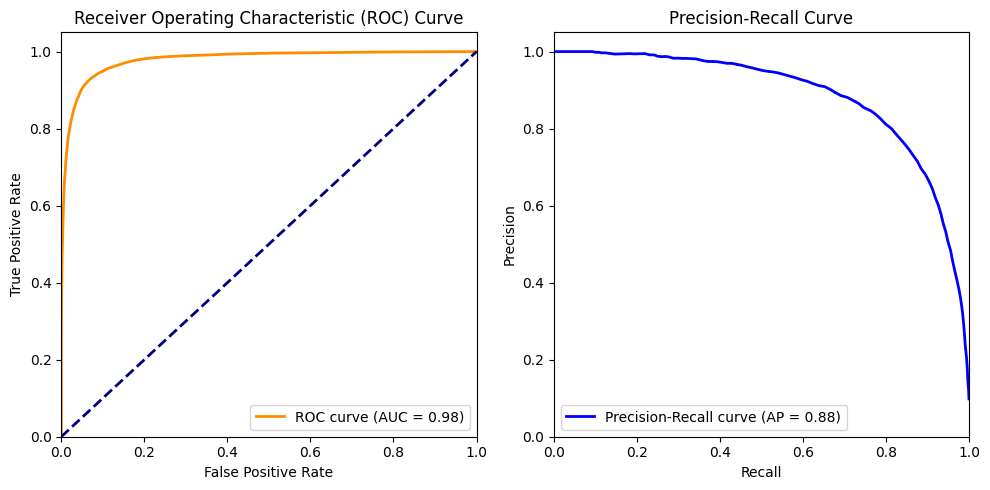

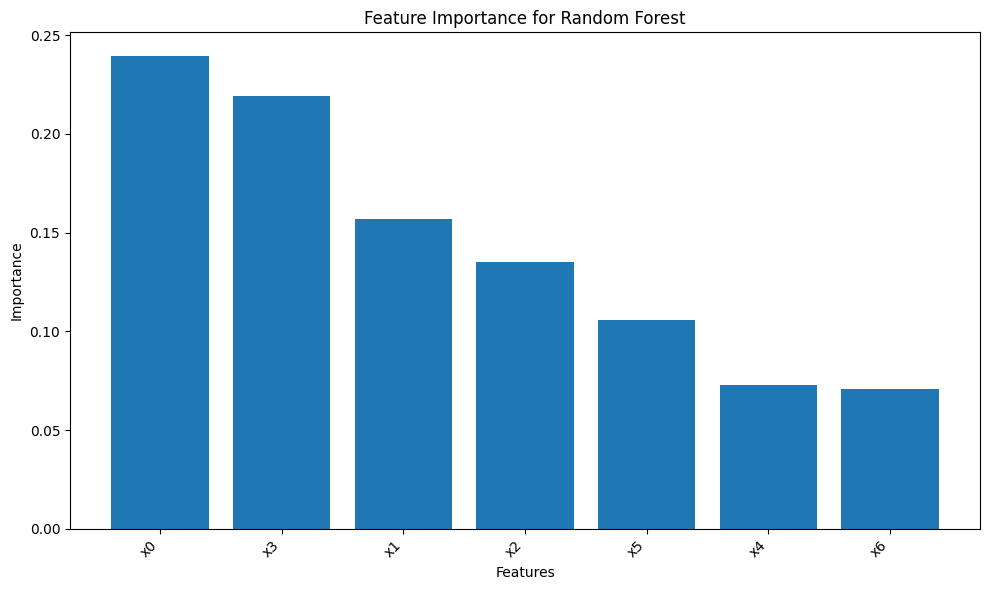

Best model: Random Forest
AUC: 0.9787
Average Precision: 0.8823


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
import pandas as pd

# The best model and its pipeline are already defined
best_pipeline = results[best_model]['pipeline']

# Get predictions and probabilities
y_pred = best_pipeline.predict(X_test)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Feature Importance Visualization
classifier = best_pipeline.named_steps['classifier']
if hasattr(classifier, 'feature_importances_'):
    importances = classifier.feature_importances_
    feature_names = best_pipeline.named_steps['feature_selection'].get_feature_names_out()
elif hasattr(classifier, 'coef_'):
    importances = np.abs(classifier.coef_[0])
    feature_names = best_pipeline.named_steps['feature_selection'].get_feature_names_out()
else:
    print("Feature importance not available for this model.")
    importances = []
    feature_names = []

if len(importances) > 0:
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Feature Importance for {best_model}')
    plt.tight_layout()
    plt.show()

print(f"Best model: {best_model}")
print(f"AUC: {roc_auc:.4f}")
print(f"Average Precision: {average_precision:.4f}")

### Regression

#### Linear Regression, Huber Regression, Random Forest, Gradient Boosting

In [ ]:
data=df

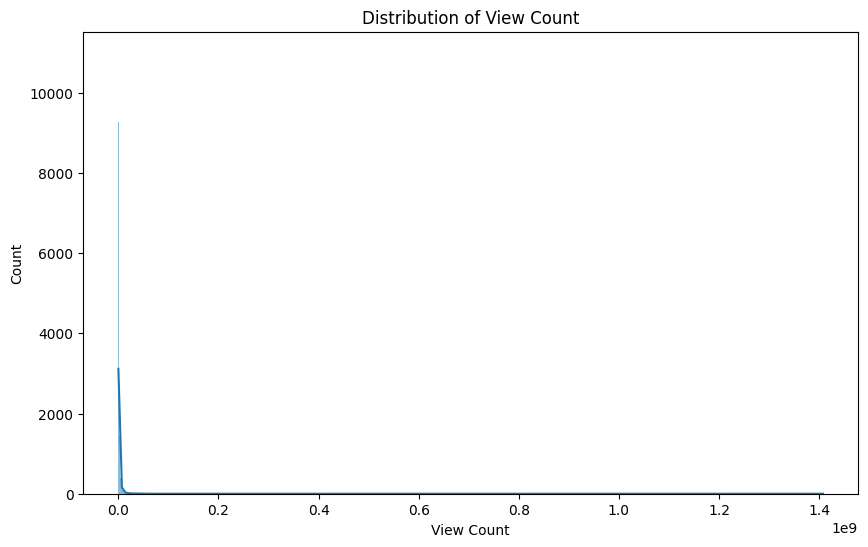

Linear Regression - MSE: 0.7179, R2: 0.4733


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Huber Regression - MSE: 0.8298, R2: 0.3912
Random Forest - MSE: 0.1538, R2: 0.8872
Gradient Boosting - MSE: 0.3154, R2: 0.7686

Best model: Random Forest
MSE: 0.1538
R2: 0.8872


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns


class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['publishedAt'] = pd.to_datetime(X_['publishedAt'])
        X_['trending_date'] = pd.to_datetime(X_['trending_date'])

        X_['days_since_published'] = (X_['trending_date'] - X_['publishedAt']).dt.total_seconds() / 86400
        X_['title_length'] = X_['title'].str.len()
        X_['tags_count'] = X_['tags'].str.count('\|') + 1
        X_['description_length'] = X_['description'].str.len()

        X_['publishedAt_dayofweek'] = X_['publishedAt'].dt.dayofweek
        X_['publishedAt_hour'] = X_['publishedAt'].dt.hour
        X_['publishedAt_year'] = X_['publishedAt'].dt.year
        X_['publishedAt_month'] = X_['publishedAt'].dt.month

        X_['trendingDate_year'] = X_['trending_date'].dt.year
        X_['trendingDate_month'] = X_['trending_date'].dt.month

        X_['days_tags_interaction'] = X_['days_since_published'] * X_['tags_count']

        X_['likes_growth_rate'] = X_['likes'] / (X_['days_since_published'] + 1e-6)
        X_['comment_count_growth_rate'] = X_['comment_count'] / (X_['days_since_published'] + 1e-6)

        return X_


features = ['publishedAt', 'trending_date', 'title', 'tags', 'description', 'categoryId',
           'comment_count', 'likes']
target = 'view_count'

plt.figure(figsize=(10, 6))
sns.histplot(data[target], kde=True)
plt.title('Distribution of View Count')
plt.xlabel('View Count')
plt.show()

data['log_view_count'] = np.log1p(data[target])

X = data[features]
y = data['log_view_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['days_since_published', 'comment_count', 'likes', 'title_length', 'tags_count',
                   'description_length', 'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId',
                   'days_tags_interaction', 'likes_growth_rate', 'comment_count_growth_rate',
                   'publishedAt_year', 'publishedAt_month', 'trendingDate_year', 'trendingDate_month']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

models = {
    'Linear Regression': LinearRegression(),
    'Huber Regression': HuberRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('feature_engineer', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k='all')),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return pipeline, mse, r2

results = {}

for name, model in models.items():
    pipeline, mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'mse': mse, 'r2': r2, 'pipeline': pipeline}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")
    print("="*50)

best_model = max(results, key=lambda x: results[x]['r2'])
print(f"\nBest model: {best_model}")
print(f"MSE: {results[best_model]['mse']:.4f}")
print(f"R2: {results[best_model]['r2']:.4f}")

best_pipeline = results[best_model]['pipeline']


# GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Huber Regression': {
        'regressor__epsilon': [1.1, 1.35, 1.5],
        'regressor__alpha': [0.0001, 0.001, 0.01]
    },
    'Random Forest': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.1, 0.3]
    }
}

# GridSearchCV on best model
param_grid = param_grids[best_model]

if param_grid:
    grid_search = GridSearchCV(best_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    print("\nBest parameters:", grid_search.best_params_)
    print("Best MSE:", -grid_search.best_score_)

    y_pred = grid_search.predict(X_test)
else:
    y_pred = best_pipeline.predict(X_test)

y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

final_mse = mean_squared_error(y_test_original, y_pred_original)
final_r2 = r2_score(y_test_original, y_pred_original)

print("\nFinal Model Performance (on original scale):")
print(f"MSE: {final_mse:.2f}")
print(f"R2: {final_r2:.4f}")

if hasattr(best_pipeline.named_steps['regressor'], 'feature_importances_'):
    importances = best_pipeline.named_steps['regressor'].feature_importances_
    feature_names = best_pipeline.named_steps['feature_selection'].get_feature_names_out()
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
    print("\nFeature Importance:")
    print(feature_importance.sort_values('importance', ascending=False))
elif hasattr(best_pipeline.named_steps['regressor'], 'coef_'):
    coefficients = best_pipeline.named_steps['regressor'].coef_
    feature_names = best_pipeline.named_steps['feature_selection'].get_feature_names_out()
    feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': np.abs(coefficients)})
    print("\nFeature Importance (based on absolute coefficients):")
    print(feature_importance.sort_values('coefficient', ascending=False))

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.title('Predicted vs Actual View Count')
plt.show()

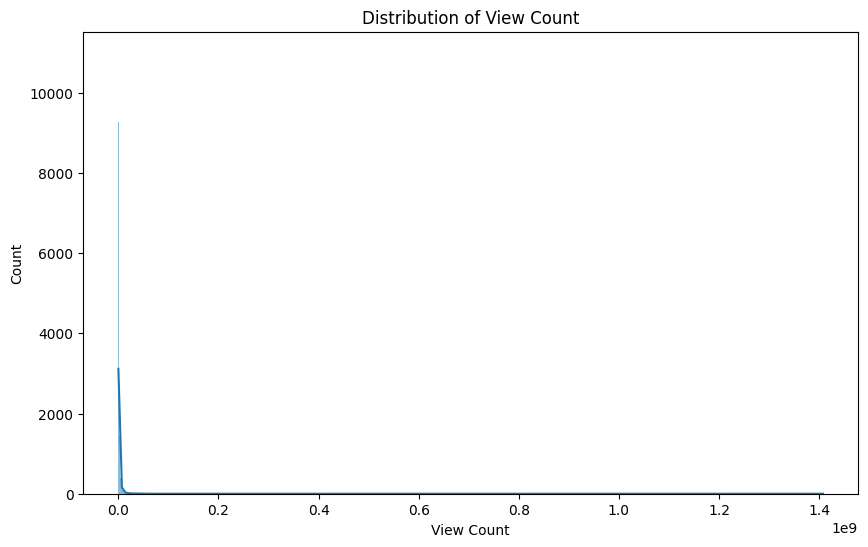

Linear Regression - MSE: 0.7179, R2: 0.4733


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Huber Regression - MSE: 0.8298, R2: 0.3912


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns


class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['publishedAt'] = pd.to_datetime(X_['publishedAt'])
        X_['trending_date'] = pd.to_datetime(X_['trending_date'])

        X_['days_since_published'] = (X_['trending_date'] - X_['publishedAt']).dt.total_seconds() / 86400
        X_['title_length'] = X_['title'].str.len()
        X_['tags_count'] = X_['tags'].str.count('\|') + 1
        X_['description_length'] = X_['description'].str.len()

        X_['publishedAt_dayofweek'] = X_['publishedAt'].dt.dayofweek
        X_['publishedAt_hour'] = X_['publishedAt'].dt.hour
        X_['publishedAt_year'] = X_['publishedAt'].dt.year
        X_['publishedAt_month'] = X_['publishedAt'].dt.month

        X_['trendingDate_year'] = X_['trending_date'].dt.year
        X_['trendingDate_month'] = X_['trending_date'].dt.month

        X_['days_tags_interaction'] = X_['days_since_published'] * X_['tags_count']

        X_['likes_growth_rate'] = X_['likes'] / (X_['days_since_published'] + 1e-6)
        X_['comment_count_growth_rate'] = X_['comment_count'] / (X_['days_since_published'] + 1e-6)

        return X_


features = ['publishedAt', 'trending_date', 'title', 'tags', 'description', 'categoryId',
           'comment_count', 'likes']
target = 'view_count'

plt.figure(figsize=(10, 6))
sns.histplot(data[target], kde=True)
plt.title('Distribution of View Count')
plt.xlabel('View Count')
plt.show()

data['log_view_count'] = np.log1p(data[target])

X = data[features]
y = data['log_view_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['days_since_published', 'comment_count', 'likes', 'title_length', 'tags_count',
                   'description_length', 'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId',
                   'days_tags_interaction', 'likes_growth_rate', 'comment_count_growth_rate',
                   'publishedAt_year', 'publishedAt_month', 'trendingDate_year', 'trendingDate_month']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

models = {
    'Linear Regression': LinearRegression(),
    'Huber Regression': HuberRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('feature_engineer', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k='all')),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return pipeline, mse, r2

results = {}

for name, model in models.items():
    pipeline, mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'mse': mse, 'r2': r2, 'pipeline': pipeline}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")
    print("="*50)

best_model = max(results, key=lambda x: results[x]['r2'])
print(f"\nBest model: {best_model}")
print(f"MSE: {results[best_model]['mse']:.4f}")
print(f"R2: {results[best_model]['r2']:.4f}")

best_pipeline = results[best_model]['pipeline']


# GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Huber Regression': {
        'regressor__epsilon': [1.1, 1.35, 1.5],
        'regressor__alpha': [0.0001, 0.001, 0.01]
    },
    'Random Forest': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.1, 0.3]
    }
}

# GridSearchCV on best model
param_grid = param_grids[best_model]

if param_grid:
    grid_search = GridSearchCV(best_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    print("\nBest parameters:", grid_search.best_params_)
    print("Best MSE:", -grid_search.best_score_)

    y_pred = grid_search.predict(X_test)
else:
    y_pred = best_pipeline.predict(X_test)

y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

final_mse = mean_squared_error(y_test_original, y_pred_original)
final_r2 = r2_score(y_test_original, y_pred_original)

print("\nFinal Model Performance (on original scale):")
print(f"MSE: {final_mse:.2f}")
print(f"R2: {final_r2:.4f}")

if hasattr(best_pipeline.named_steps['regressor'], 'feature_importances_'):
    importances = best_pipeline.named_steps['regressor'].feature_importances_
    feature_names = best_pipeline.named_steps['feature_selection'].get_feature_names_out()
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
    print("\nFeature Importance:")
    print(feature_importance.sort_values('importance', ascending=False))
elif hasattr(best_pipeline.named_steps['regressor'], 'coef_'):
    coefficients = best_pipeline.named_steps['regressor'].coef_
    feature_names = best_pipeline.named_steps['feature_selection'].get_feature_names_out()
    feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': np.abs(coefficients)})
    print("\nFeature Importance (based on absolute coefficients):")
    print(feature_importance.sort_values('coefficient', ascending=False))

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.title('Predicted vs Actual View Count')
plt.show()

#### Automated ML Methods

In [ ]:
data = df

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00


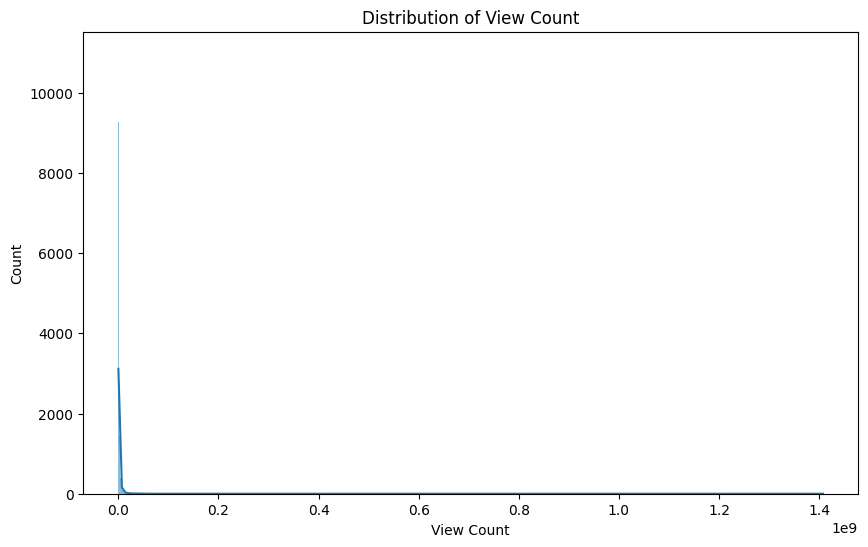

[I 2024-11-14 20:50:43,076] A new study created in memory with name: no-name-a4965edd-899e-4808-b200-ba9b1c22b81e
[I 2024-11-14 21:23:01,140] Trial 0 finished with value: 0.21810960537561883 and parameters: {'model_type': 'gb', 'n_estimators': 906, 'learning_rate': 0.021992823936209403, 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 9, 'k': 12}. Best is trial 0 with value: 0.21810960537561883.
[I 2024-11-14 21:46:03,304] Trial 1 finished with value: 0.314512730396578 and parameters: {'model_type': 'gb', 'n_estimators': 617, 'learning_rate': 0.004657589020445843, 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 2, 'k': 15}. Best is trial 0 with value: 0.21810960537561883.
[W 2024-11-14 21:55:03,435] Trial 2 failed with parameters: {'model_type': 'rf', 'n_estimators': 780, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 9, 'k': 12} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import optuna

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['publishedAt'] = pd.to_datetime(X_['publishedAt'])
        X_['trending_date'] = pd.to_datetime(X_['trending_date'])

        X_['days_since_published'] = (X_['trending_date'] - X_['publishedAt']).dt.total_seconds() / 86400
        X_['title_length'] = X_['title'].str.len()
        X_['tags_count'] = X_['tags'].str.count('\|') + 1
        X_['description_length'] = X_['description'].str.len()

        X_['publishedAt_dayofweek'] = X_['publishedAt'].dt.dayofweek
        X_['publishedAt_hour'] = X_['publishedAt'].dt.hour
        X_['publishedAt_year'] = X_['publishedAt'].dt.year
        X_['publishedAt_month'] = X_['publishedAt'].dt.month

        X_['trendingDate_year'] = X_['trending_date'].dt.year
        X_['trendingDate_month'] = X_['trending_date'].dt.month

        X_['days_tags_interaction'] = X_['days_since_published'] * X_['tags_count']

        X_['likes_growth_rate'] = X_['likes'] / (X_['days_since_published'] + 1e-6)
        X_['comment_count_growth_rate'] = X_['comment_count'] / (X_['days_since_published'] + 1e-6)

        return X_


features = ['publishedAt', 'trending_date', 'title', 'tags', 'description', 'categoryId',
           'comment_count', 'likes']
target = 'view_count'

plt.figure(figsize=(10, 6))
sns.histplot(data[target], kde=True)
plt.title('Distribution of View Count')
plt.xlabel('View Count')
plt.show()

data['log_view_count'] = np.log1p(data[target])

# Split the data
X = data[features]
y = data['log_view_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['days_since_published', 'comment_count', 'likes', 'title_length', 'tags_count',
                   'description_length', 'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId',
                   'days_tags_interaction', 'likes_growth_rate', 'comment_count_growth_rate',
                   'publishedAt_year', 'publishedAt_month', 'trendingDate_year', 'trendingDate_month']





categorical_features = ['categoryId']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('to_string', FunctionTransformer(lambda x: x.astype(str))),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

def create_model(trial):
    model_type = trial.suggest_categorical('model_type', ['rf', 'gb', 'elastic'])

    if model_type == 'rf':
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int('n_estimators', 100, 1000),
            max_depth=trial.suggest_int('max_depth', 5, 30),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10)
        )
    elif model_type == 'gb':
        model = GradientBoostingRegressor(
            n_estimators=trial.suggest_int('n_estimators', 100, 1000),
            learning_rate=trial.suggest_float('learning_rate', 1e-3, 1.0, log=True),
            max_depth=trial.suggest_int('max_depth', 3, 10),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10)
        )
    else:
        model = ElasticNet(
            alpha=trial.suggest_float('alpha', 1e-5, 1.0, log=True),
            l1_ratio=trial.suggest_float('l1_ratio', 0, 1)
        )

    pipeline = Pipeline([
        ('feature_engineer', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_regression, k=trial.suggest_int('k', 1, len(numeric_features) + len(categorical_features)))),
        ('regressor', model)
    ])

    return pipeline

def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5) # try 'n_trails=100' later if time permits

best_model = create_model(study.best_trial)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model: {study.best_trial.params['model_type']}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

final_mse = mean_squared_error(y_test_original, y_pred_original)
final_r2 = r2_score(y_test_original, y_pred_original)

print("\nFinal Model Performance (on original scale):")
print(f"MSE: {final_mse:.2f}")
print(f"R2: {final_r2:.4f}")

#### Neural Networks

##### Trials

Epoch 1/5
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 1605s 605ms/step - loss: 45.9583 - val_loss: 1.4438 - learning_rate: 0.0010
Epoch 2/5
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 1645s 607ms/step - loss: 1.9629 - val_loss: 1.4689 - learning_rate: 0.0010
Epoch 3/5
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 1629s 602ms/step - loss: 1.2740 - val_loss: 299.9673 - learning_rate: 0.0010
Epoch 4/5
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 1645s 603ms/step - loss: 0.9791 - val_loss: 356.3743 - learning_rate: 0.0010
Epoch 5/5
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 1591s 602ms/step - loss: 0.8768 - val_loss: 254.9371 - learning_rate: 0.0010
1651/1651 ━━━━━━━━━━━━━━━━━━━━ 153s 92ms/step
MSE: 1.4307
R2: -0.0497

Final Model Performance (on original scale):
MSE: 4333530208856657.50
R2: -26.4548


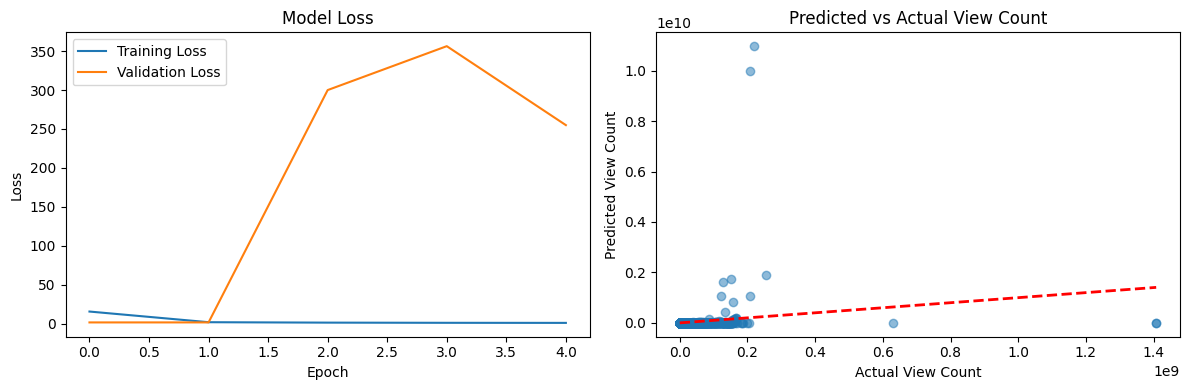

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


features = ['publishedAt', 'trending_date', 'title', 'tags', 'description', 'categoryId',
           'comment_count', 'likes']
target = 'view_count'

X = data[features]
y = np.log1p(data[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fe = FeatureEngineer()
X_train_fe = fe.fit_transform(X_train)
X_test_fe = fe.transform(X_test)


numeric_features = ['days_since_published', 'comment_count', 'likes', 'title_length', 'tags_count',
                   'description_length', 'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId',
                   'days_tags_interaction', 'likes_growth_rate', 'comment_count_growth_rate',
                   'publishedAt_year', 'publishedAt_month', 'trendingDate_year', 'trendingDate_month']

categorical_features = ['categoryId']
text_features = ['title', 'tags', 'description']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('to_string', FunctionTransformer(lambda x: x.astype(str))),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train_fe)
X_test_processed = preprocessor.transform(X_test_fe)

max_words = 512
max_len = 100

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_fe['title'] + ' ' + X_train_fe['tags'] ) # deleted description, too much noise --  code + ' ' + X_train_fe['description']

X_train_text = tokenizer.texts_to_sequences(X_train_fe['title'] + ' ' + X_train_fe['tags']) #  + ' ' + X_train_fe['description']
X_test_text = tokenizer.texts_to_sequences(X_test_fe['title'] + ' ' + X_test_fe['tags']) # + ' ' + X_test_fe['description']

X_train_text = tf.keras.preprocessing.sequence.pad_sequences(X_train_text, maxlen=max_len)
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, maxlen=max_len)

def create_model(input_dim, text_input_dim, embed_dim=128, num_heads=4):
    input_features = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(input_features)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    text_input = Input(shape=(max_len,))
    embedding = Embedding(max_words, embed_dim)(text_input)

    attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(embedding, embedding)
    attention = Flatten()(attention)

    combined = Concatenate()([x, attention])

    x = Dense(512, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    output = Dense(1)(x)

    model = Model(inputs=[input_features, text_input], outputs=output)
    return model

input_dim = X_train_processed.shape[1]
model = create_model(input_dim, max_len)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    [X_train_processed, X_train_text], y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

y_pred = model.predict([X_test_processed, X_test_text])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

final_mse = mean_squared_error(y_test_original, y_pred_original)
final_r2 = r2_score(y_test_original, y_pred_original)

print("\nFinal Model Performance (on original scale):")
print(f"MSE: {final_mse:.2f}")
print(f"R2: {final_r2:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.title('Predicted vs Actual View Count')
plt.tight_layout()
plt.show()

**Observations and To-Dos:** The model might be starting to overfit the training data, especially for epoch 3,4, and 5 we can see that the validation loss is increasing while the training loss is decreasing. There could be issues with the validation data, like outliers or mislabels, that are causing the validation loss to spike. Or, the learning rate might be too high, causing the model to overshoot optimal weights and causing large fluctuations in the loss.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

features = ['publishedAt', 'trending_date', 'title', 'tags', 'description', 'categoryId',
           'comment_count', 'likes']
target = 'view_count'

X = data[features]
y = np.log1p(data[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fe = FeatureEngineer()
X_train_fe = fe.fit_transform(X_train)
X_test_fe = fe.transform(X_test)

numeric_features = ['days_since_published', 'comment_count', 'likes', 'title_length', 'tags_count',
                   'description_length', 'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId',
                   'days_tags_interaction', 'likes_growth_rate', 'comment_count_growth_rate',
                   'publishedAt_year', 'publishedAt_month', 'trendingDate_year', 'trendingDate_month']

categorical_features = ['categoryId']
text_features = ['title', 'tags', 'description']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('to_string', FunctionTransformer(lambda x: x.astype(str))),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train_fe)
X_test_processed = preprocessor.transform(X_test_fe)

max_words = 512
max_len = 100

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_fe['title'] + ' ' + X_train_fe['tags'])  # Only using title + tags

X_train_text = tokenizer.texts_to_sequences(X_train_fe['title'] + ' ' + X_train_fe['tags'])
X_test_text = tokenizer.texts_to_sequences(X_test_fe['title'] + ' ' + X_test_fe['tags'])

X_train_text = tf.keras.preprocessing.sequence.pad_sequences(X_train_text, maxlen=max_len)
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, maxlen=max_len)

def create_model(input_dim, text_input_dim, embed_dim=128, num_heads=4):
    input_features = Input(shape=(input_dim,))
    x = Dense(128, activation='relu')(input_features)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    text_input = Input(shape=(max_len,))
    embedding = Embedding(max_words, embed_dim)(text_input)

    attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(embedding, embedding)
    attention = Flatten()(attention)

    combined = Concatenate()([x, attention])

    x = Dense(256, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    output = Dense(1)(x)

    model = Model(inputs=[input_features, text_input], outputs=output)
    return model

input_dim = X_train_processed.shape[1]
model = create_model(input_dim, max_len)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    [X_train_processed, X_train_text], y_train,
    validation_split=0.2,
    epochs=3,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

y_pred = model.predict([X_test_processed, X_test_text])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

final_mse = mean_squared_error(y_test_original, y_pred_original)
final_r2 = r2_score(y_test_original, y_pred_original)

print("\nFinal Model Performance (on original scale):")
print(f"MSE: {final_mse:.2f}")
print(f"R2: {final_r2:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.title('Predicted vs Actual View Count')
plt.tight_layout()
plt.show()


Epoch 1/3
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 1379s 520ms/step - loss: 46.0759 - val_loss: 3.7571 - learning_rate: 0.0010
Epoch 2/3
 863/2642 ━━━━━━━━━━━━━━━━━━━━ 14:16 481ms/step - loss: 2.1070

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.activations import gelu
data = df

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['publishedAt'] = pd.to_datetime(X_['publishedAt'])
        X_['trending_date'] = pd.to_datetime(X_['trending_date'])

        X_['days_since_published'] = (X_['trending_date'] - X_['publishedAt']).dt.total_seconds() / 86400
        X_['title_length'] = X_['title'].str.len()
        X_['tags_count'] = X_['tags'].str.count('\|') + 1
        X_['description_length'] = X_['description'].str.len()

        X_['publishedAt_dayofweek'] = X_['publishedAt'].dt.dayofweek
        X_['publishedAt_hour'] = X_['publishedAt'].dt.hour
        X_['publishedAt_year'] = X_['publishedAt'].dt.year
        X_['publishedAt_month'] = X_['publishedAt'].dt.month

        X_['trendingDate_year'] = X_['trending_date'].dt.year
        X_['trendingDate_month'] = X_['trending_date'].dt.month

        X_['days_tags_interaction'] = X_['days_since_published'] * X_['tags_count']

        X_['likes_growth_rate'] = X_['likes'] / (X_['days_since_published'] + 1e-6)
        X_['comment_count_growth_rate'] = X_['comment_count'] / (X_['days_since_published'] + 1e-6)

        return X_

features = ['publishedAt', 'trending_date', 'title', 'tags', 'description', 'categoryId',
           'comment_count', 'likes']
target = 'view_count'

X = data[features]
y = np.log1p(data[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fe = FeatureEngineer()
X_train_fe = fe.fit_transform(X_train)
X_test_fe = fe.transform(X_test)

numeric_features = ['days_since_published', 'comment_count', 'likes', 'title_length', 'tags_count',
                   'description_length', 'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId',
                   'days_tags_interaction', 'likes_growth_rate', 'comment_count_growth_rate',
                   'publishedAt_year', 'publishedAt_month', 'trendingDate_year', 'trendingDate_month']

categorical_features = ['categoryId']
text_features = ['title', 'tags', 'description']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('to_string', FunctionTransformer(lambda x: x.astype(str))),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train_fe)
X_test_processed = preprocessor.transform(X_test_fe)


class PositionalEncoding(Layer):
    def __init__(self, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense = Dense(embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[1], delta=1, dtype=tf.float32)
        positions = tf.expand_dims(positions, axis=1)
        pos_encoding = self.dense(positions)
        pos_encoding = tf.expand_dims(pos_encoding, axis=0)
        return x + pos_encoding

    def get_config(self):
        config = super().get_config()
        config.update({"embed_dim": self.embed_dim})
        return config

def transformer_block(x, embed_dim, num_heads, ff_dim, dropout=0.1):
    x = PositionalEncoding(embed_dim)(x)
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim//num_heads)(x, x)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([x, attn_output]))

    ff_output = Dense(ff_dim, activation='gelu')(out1)
    ff_output = Dense(embed_dim)(ff_output)
    ff_output = Dropout(dropout)(ff_output)

    return LayerNormalization(epsilon=1e-6)(Add()([out1, ff_output]))

def create_advanced_model(input_dim, text_input_dim, embed_dim=256):
    # Numeric branch
    numeric_input = Input(shape=(input_dim,))
    x_numeric = Dense(512, activation='gelu', kernel_regularizer=l2(1e-4))(numeric_input)
    x_numeric = BatchNormalization()(x_numeric)
    x_numeric = Dropout(0.3)(x_numeric)

    # Text branch
    text_input = Input(shape=(max_len,))
    x_text = Embedding(max_words, embed_dim)(text_input)

    x_text = transformer_block(x_text, embed_dim, 8, embed_dim*4)
    x_text = transformer_block(x_text, embed_dim, 8, embed_dim*4)

    # Global attention with corrected shapes
    attention = Dense(1)(x_text)  # Shape: (batch, seq_len, 1)
    attention_weights = Softmax(axis=1)(attention)  # Normalize across sequence length
    x_text = tf.keras.layers.Multiply()([x_text, attention_weights])
    x_text = Dense(512)(GlobalAveragePooling1D()(x_text))  # Match numeric branch dimension

    # Combine features
    x = Concatenate()([x_numeric, x_text])  # Now both are shape (batch, 512)

    # Deep network
    x = Dense(1024, activation='gelu', kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    output = Dense(2)(x)  # Output shape: (batch_size, 2)
    mean = Lambda(lambda x: x[..., 0], name='mean')(output)
    variance = Lambda(lambda x: tf.nn.softplus(x[..., 1]) + 1e-6, name='variance')(output)

    return Model(inputs=[numeric_input, text_input], outputs=[mean, variance])


# Custom loss function
def gaussian_nll(y_true, y_pred):
    mean = y_pred
    variance = 1.0  # Fixed variance for mean prediction
    return 0.5 * tf.math.log(variance) + 0.5 * tf.math.square(y_true - mean) / variance


# Preprocessing (assuming you have the preprocessor from before)
X_train_processed = preprocessor.fit_transform(X_train_fe)
X_test_processed = preprocessor.transform(X_test_fe)

# Text preprocessing
max_words = 512
max_len = 50
embed_dim = 256

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_fe['title'] + ' ' + X_train_fe['tags'])
X_train_text = tokenizer.texts_to_sequences(X_train_fe['title'] + ' ' + X_train_fe['tags'])
X_test_text = tokenizer.texts_to_sequences(X_test_fe['title'] + ' ' + X_test_fe['tags'])

X_train_text = tf.keras.preprocessing.sequence.pad_sequences(X_train_text, maxlen=max_len)
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, maxlen=max_len)

# Create and compile model
input_dim = X_train_processed.shape[1]
model = create_advanced_model(input_dim, max_len)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='mse',  # Use MSE for mean prediction only
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_mean_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_mean_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# Training
history = model.fit(
    [X_train_processed, X_train_text],
    y_train,
    validation_split=0.2,
    epochs=3,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

# Predictions
mean_pred, variance_pred = model.predict([X_test_processed, X_test_text])
y_pred = mean_pred.flatten()

# Transform back to original scale
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test_original, y_pred_original)
final_r2 = r2_score(y_test_original, y_pred_original)

# Plotting
plt.figure(figsize=(20, 10))

# Loss plots
plt.subplot(2, 2, 1)
plt.plot(history.history['mean_loss'], label='Training Loss (Mean)')
plt.plot(history.history['val_mean_loss'], label='Validation Loss (Mean)')
plt.title('Model Loss (Mean Prediction)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['variance_loss'], label='Training Loss (Variance)')
plt.plot(history.history['val_variance_loss'], label='Validation Loss (Variance)')
plt.title('Model Loss (Variance Prediction)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Predicted vs Actual plot
plt.subplot(2, 2, 3)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.title('Predicted vs Actual View Count')

# Uncertainty visualization
plt.subplot(2, 2, 4)
uncertainty = np.sqrt(np.expm1(variance_pred))
plt.scatter(y_pred_original, uncertainty, alpha=0.5)
plt.xlabel('Predicted View Count')
plt.ylabel('Prediction Uncertainty')
plt.title('Prediction Uncertainty vs Predicted Views')

plt.tight_layout()
plt.show()

# Print metrics
print("\nModel Performance (log scale):")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")
print("\nModel Performance (original scale):")
print(f"MSE: {final_mse:.2f}")
print(f"R2: {final_r2:.4f}")

# Save uncertainty analysis
plt.figure(figsize=(12, 6))
percentiles = np.percentile(uncertainty, [25, 50, 75, 90, 95, 99])
sns.histplot(uncertainty, bins=50)
plt.title('Distribution of Prediction Uncertainties')
plt.xlabel('Uncertainty')
plt.ylabel('Count')
for i, p in enumerate([25, 50, 75, 90, 95, 99]):
    plt.axvline(percentiles[i], color='r', linestyle='--', alpha=0.5,
                label=f'{p}th percentile')
plt.legend()
plt.show()

Epoch 1/3
 370/1321 ━━━━━━━━━━━━━━━━━━━━ 52:04 3s/step - loss: 185.6566

KeyboardInterrupt: 

##### Final Model

Epoch 1/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 93s 34ms/step - loss: 14.3089 - val_loss: 1.1981 - learning_rate: 1.0000e-04
Epoch 2/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 141s 34ms/step - loss: 4.1564 - val_loss: 0.9387 - learning_rate: 1.0000e-04
Epoch 3/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 91s 34ms/step - loss: 3.8293 - val_loss: 0.5113 - learning_rate: 1.0000e-04
Epoch 4/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 148s 37ms/step - loss: 3.5461 - val_loss: 0.5793 - learning_rate: 1.0000e-04
Epoch 5/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 90s 34ms/step - loss: 3.3222 - val_loss: 0.6355 - learning_rate: 1.0000e-04
Epoch 6/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 91s 34ms/step - loss: 3.1713 - val_loss: 0.4700 - learning_rate: 1.0000e-04
Epoch 7/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 141s 34ms/step - loss: 2.9069 - val_loss: 0.3773 - learning_rate: 1.0000e-04
Epoch 8/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 90s 34ms/step - loss: 2.7120 - val_loss: 0.4233 - learning_rate: 1.0000e-04
Epoch 9/50
2642/2642 ━━━━━━━━━━━━━━━━━━━━ 142s 34ms/

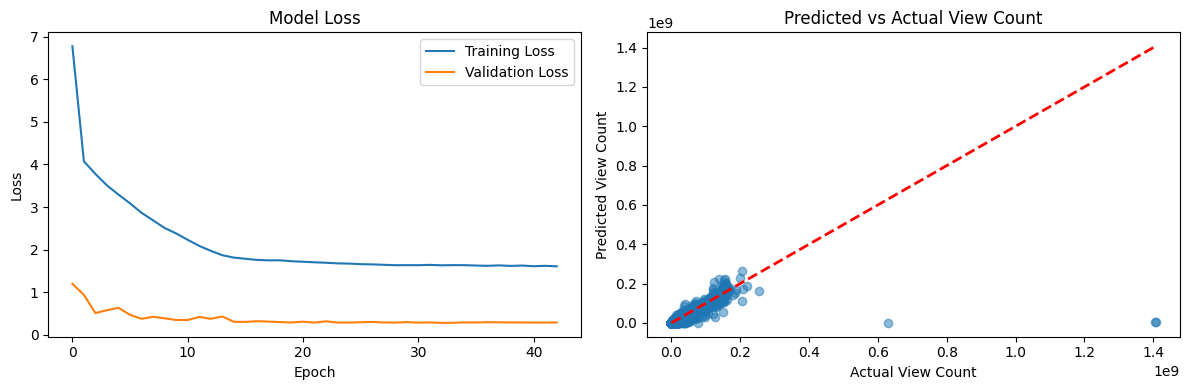

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

features = ['publishedAt', 'trending_date', 'title', 'tags', 'description', 'categoryId',
           'comment_count', 'likes']
target = 'view_count'

X = data[features]
y = np.log1p(data[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fe = FeatureEngineer()
X_train_fe = fe.fit_transform(X_train)
X_test_fe = fe.transform(X_test)

numeric_features = ['days_since_published', 'comment_count', 'likes', 'title_length', 'tags_count',
                   'description_length', 'publishedAt_dayofweek', 'publishedAt_hour', 'categoryId',
                   'days_tags_interaction', 'likes_growth_rate', 'comment_count_growth_rate',
                   'publishedAt_year', 'publishedAt_month', 'trendingDate_year', 'trendingDate_month']

categorical_features = ['categoryId']
text_features = ['title', 'tags', 'description']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('to_string', FunctionTransformer(lambda x: x.astype(str))),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train_fe)
X_test_processed = preprocessor.transform(X_test_fe)

max_words = 512 # try larger max_words?
max_len = 100

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_fe['title'] + ' ' + X_train_fe['tags'])  # description?

X_train_text = tokenizer.texts_to_sequences(X_train_fe['title'] + ' ' + X_train_fe['tags'])
X_test_text = tokenizer.texts_to_sequences(X_test_fe['title'] + ' ' + X_test_fe['tags'])

X_train_text = tf.keras.preprocessing.sequence.pad_sequences(X_train_text, maxlen=max_len)
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, maxlen=max_len)



def create_model(input_dim, text_input_dim, embed_dim=128, num_heads=2):
    input_features = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(input_features)
    x = Dropout(0.3)(x)

    text_input = Input(shape=(max_len,))
    embedding = Embedding(input_dim=max_words, output_dim=embed_dim)(text_input)
    x_text = Flatten()(embedding)

    combined = Concatenate()([x, x_text])

    x = Dense(128, activation='relu')(combined)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)

    output = Dense(1)(x)

    model = Model(inputs=[input_features, text_input], outputs=output)
    return model


input_dim = X_train_processed.shape[1]
model = create_model(input_dim, max_len)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')  # reduced learning rate

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)  # increased patience
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    [X_train_processed, X_train_text], y_train,
    validation_split=0.2,
    epochs=50,  # increased epochs
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

y_pred = model.predict([X_test_processed, X_test_text])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")


# on the original scale
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)
final_mse = mean_squared_error(y_test_original, y_pred_original)
final_r2 = r2_score(y_test_original, y_pred_original)

print("\nFinal Model Performance (on original scale):")
print(f"MSE: {final_mse:.2f}")
print(f"R2: {final_r2:.4f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.title('Predicted vs Actual View Count')
plt.tight_layout()
plt.show()


In [ ]:
print("\nFinal Model Performance (on log-transformed scale):")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

print("\nFinal Model Performance (on original scale):")
print(f"MSE: {final_mse:.2f}")
print(f"R2: {final_r2:.4f}")


Final Model Performance (on log-transformed scale):
MSE: 0.2830
R2: 0.7924

Final Model Performance (on original scale):
MSE: 90627442164645.19
R2: 0.4258


**Observation:** The model is effective on the log-transformed target, but struggles with the raw predictions.

**My Guess:**
- Dropout layers or batch size are influencing this discrepancy?

- Validation set is easier / less noisy?

- Early stopping or dropout layers are helping the model generalize better on the validation set instead of the trainging data, preventing it from memorizing the training data too closely?

- Architecture/learning rate are influencing this behavior?

- Code Error?


